In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
a=pd.read_csv('energy_dataset.csv')
b=pd.read_csv('Electricity.csv')


<ipython-input-4-b5bcf0dafe30>:2: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  b=pd.read_csv('Electricity.csv')


In [ ]:
a.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
b.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [ ]:
a = a.drop(['generation fossil coal-derived gas','generation fossil oil shale',
                            'generation fossil peat', 'generation geothermal',
                            'generation hydro pumped storage aggregated', 'generation marine',
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'],
                            axis=1)


In [ ]:
a.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual'],
      dtype='object')

In [ ]:
b.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [ ]:
a.shape

(35064, 18)

In [ ]:
b.shape

(38014, 18)

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [ ]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [ ]:
a.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation hydro pumped storage consumption,19
generation hydro run-of-river and poundage,19
generation hydro water reservoir,18
generation nuclear,17


In [ ]:
a=a.dropna()
a.isnull().sum()

,0
time,0
generation biomass,0
generation fossil brown coal/lignite,0
generation fossil gas,0
generation fossil hard coal,0
generation fossil oil,0
generation hydro pumped storage consumption,0
generation hydro run-of-river and poundage,0
generation hydro water reservoir,0
generation nuclear,0


In [ ]:
b.isnull().sum()

,0
DateTime,0
Holiday,0
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,0


In [ ]:
b=b.dropna()
b.isnull().sum()

,0
DateTime,0
Holiday,0
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,0


In [ ]:
a.duplicated().sum()

0

In [ ]:
b.duplicated().sum()

0

In [ ]:
for i in a.select_dtypes(include='object').columns:
  print(a[i].value_counts())
  print(True)

time
2015-01-01 00:00:00+01:00    1
2017-09-01 14:00:00+02:00    1
2017-09-01 08:00:00+02:00    1
2017-09-01 09:00:00+02:00    1
2017-09-01 10:00:00+02:00    1
                            ..
2016-05-02 15:00:00+02:00    1
2016-05-02 14:00:00+02:00    1
2016-05-02 13:00:00+02:00    1
2016-05-02 12:00:00+02:00    1
2018-12-31 23:00:00+01:00    1
Name: count, Length: 35018, dtype: int64
True


In [ ]:
for i in b.select_dtypes(include='object').columns:
  print(b[i].value_counts())
  print(True)

DateTime
24/12/2011 00:00    1
24/12/2011 00:30    1
30/03/2013 11:00    1
30/03/2013 10:30    1
30/03/2013 10:00    1
                   ..
07/05/2012 14:30    1
07/05/2012 14:00    1
07/05/2012 13:30    1
07/05/2012 13:00    1
31/12/2013 23:30    1
Name: count, Length: 1536, dtype: int64
True
Holiday
Christmas Eve           144
Christmas               144
St Stephen's Day        144
New Year's Eve          144
New Year's Day           96
St Patrick's Day         96
Good Friday              96
Holy Saturday            96
Easter                   96
Easter Monday            96
May Day                  96
June Bank Holiday        96
August Bank Holiday      96
October Bank Holiday     96
Name: count, dtype: int64
True
ForecastWindProduction
?          4
1190.60    2
553.60     2
1213.20    2
544.00     2
          ..
508.40     1
521.50     1
535.50     1
548.40     1
1064.0     1
Name: count, Length: 1505, dtype: int64
True
SystemLoadEA
?          2
4286.95    2
3759.39    2
3960.67   

In [ ]:
b["ForecastWindProduction"] = pd.to_numeric(b["ForecastWindProduction"], errors= 'coerce')
b["SystemLoadEA"] = pd.to_numeric(b["SystemLoadEA"], errors= 'coerce')
b["SMPEA"] = pd.to_numeric(b["SMPEA"], errors= 'coerce')
b["ORKTemperature"] = pd.to_numeric(b["ORKTemperature"], errors= 'coerce')
b["ORKWindspeed"] = pd.to_numeric(b["ORKWindspeed"], errors= 'coerce')
b["CO2Intensity"] = pd.to_numeric(b["CO2Intensity"], errors= 'coerce')
b["ActualWindProduction"] = pd.to_numeric(b["ActualWindProduction"], errors= 'coerce')
b["SystemLoadEP2"] = pd.to_numeric(b["SystemLoadEP2"], errors= 'coerce')
b["SMPEP2"] = pd.to_numeric(b["SMPEP2"], errors= 'coerce')

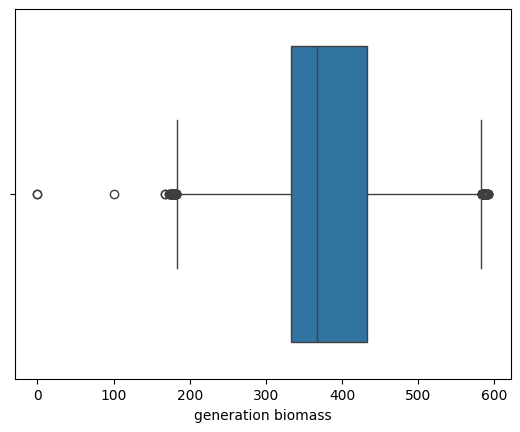

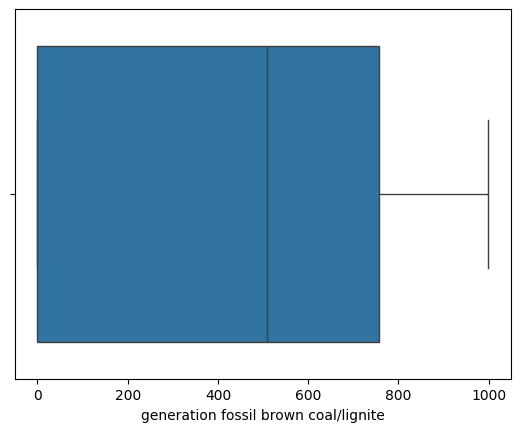

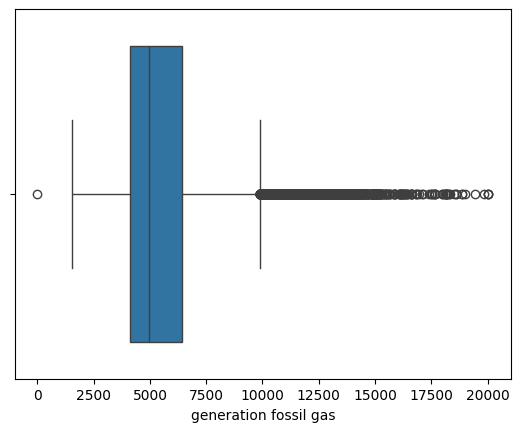

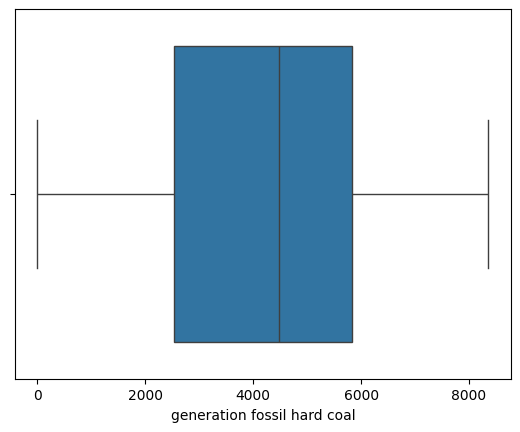

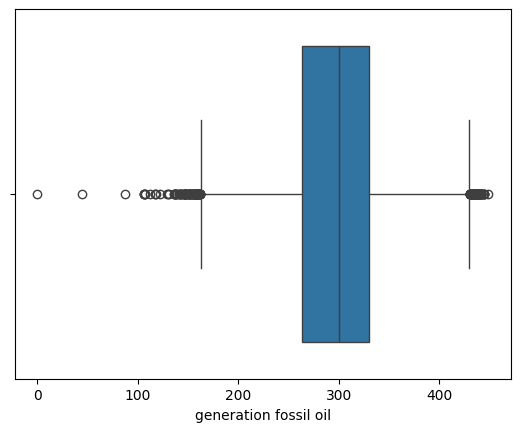

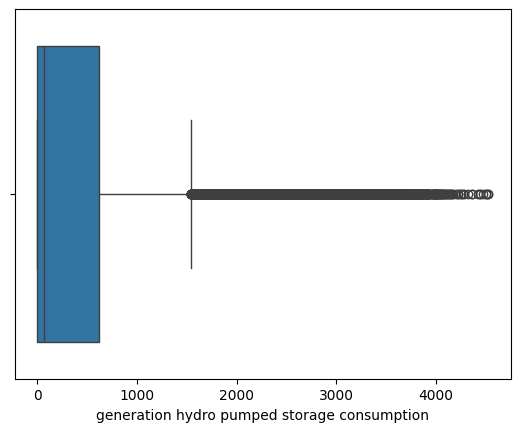

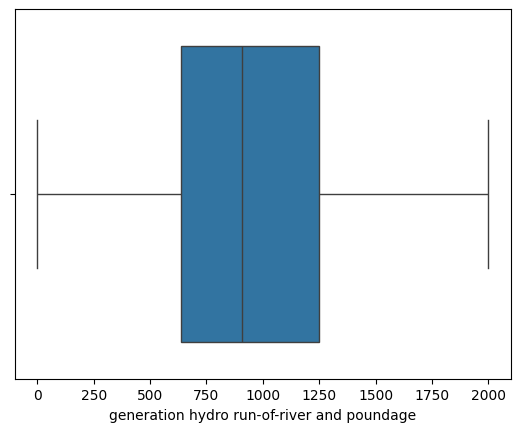

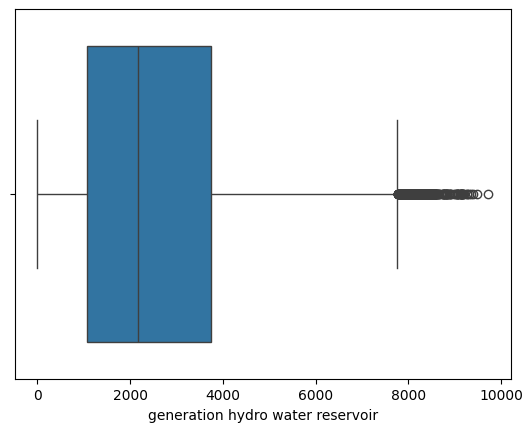

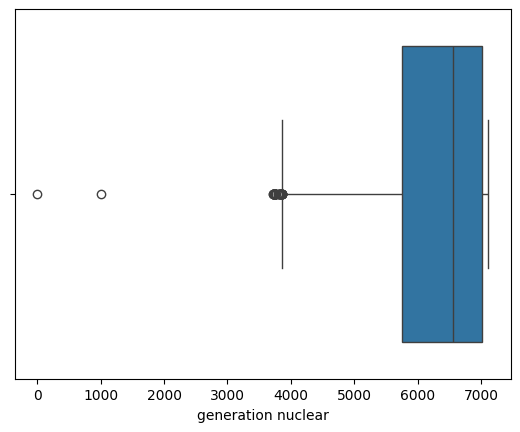

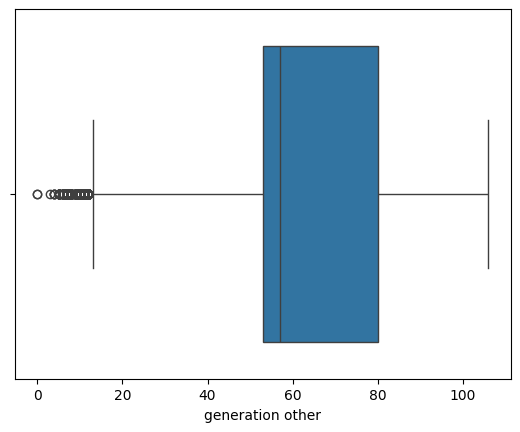

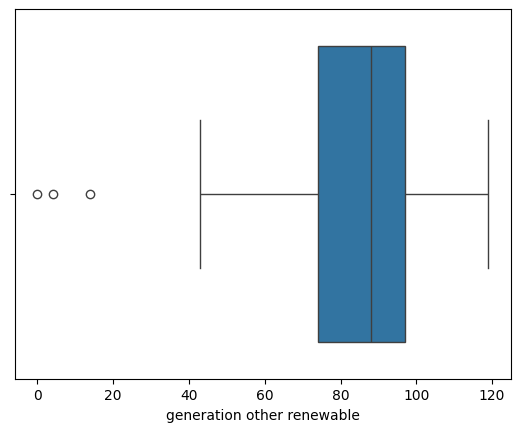

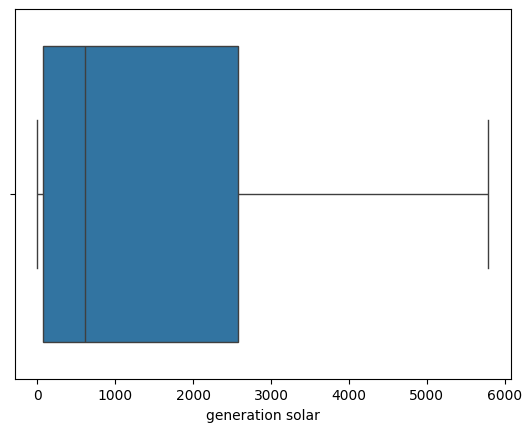

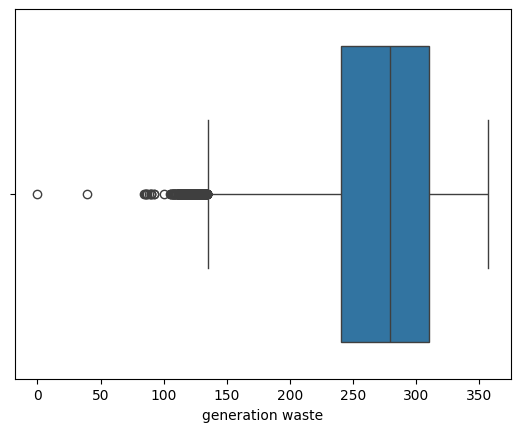

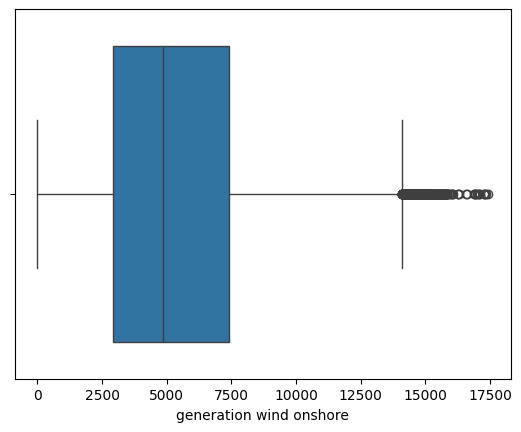

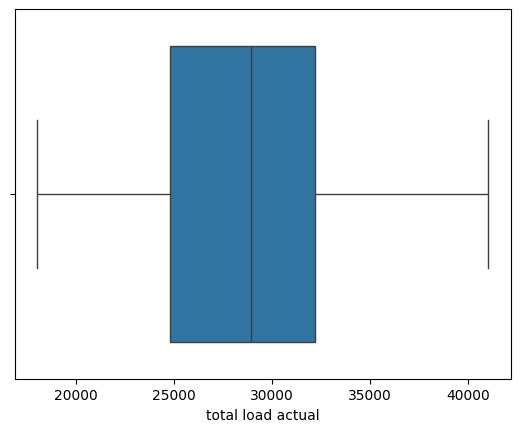

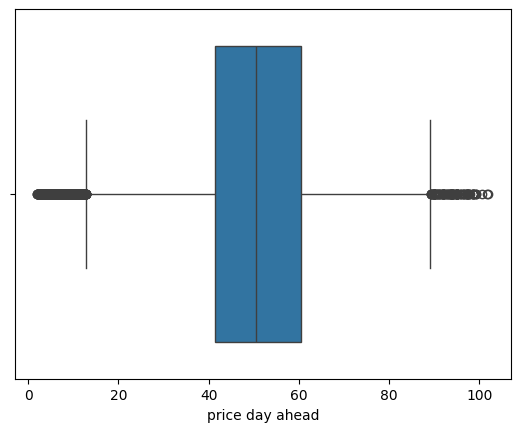

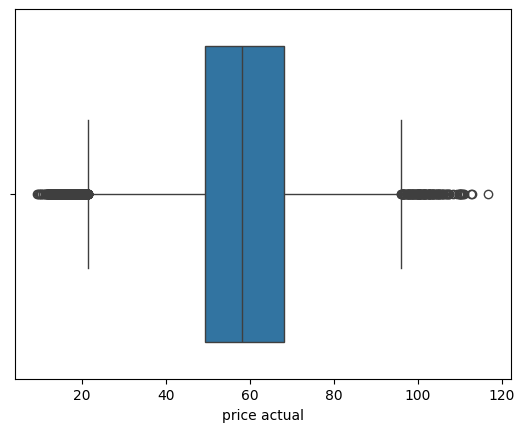

In [ ]:
for i in a.select_dtypes(include="number").columns:
  sns.boxplot(a,x=i)
  plt.show()

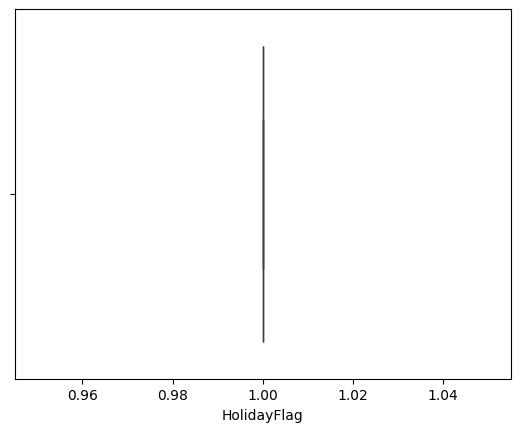

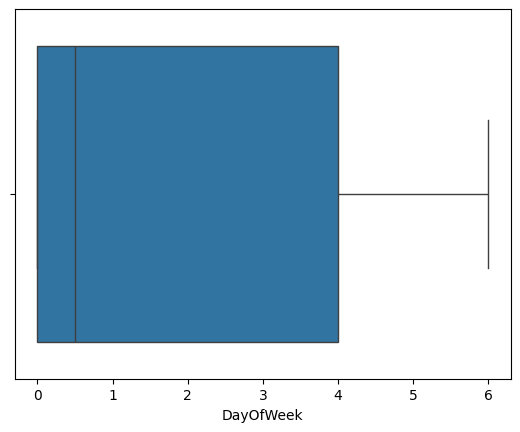

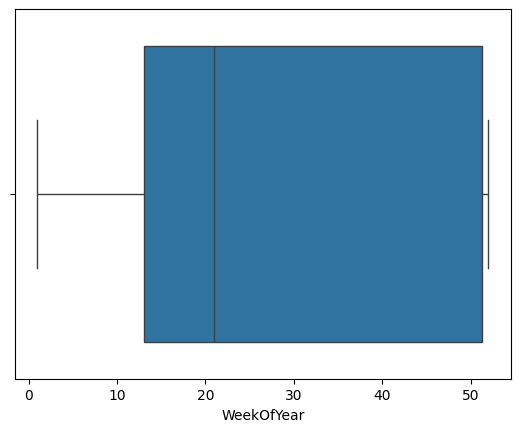

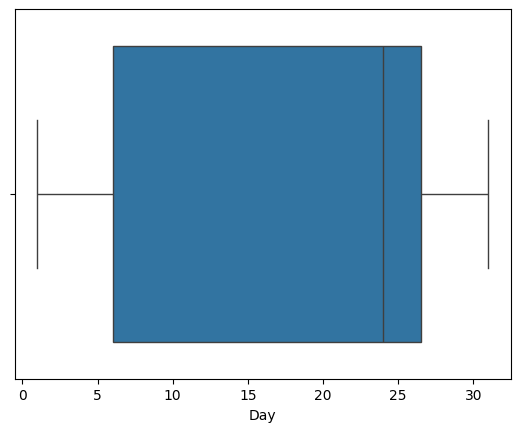

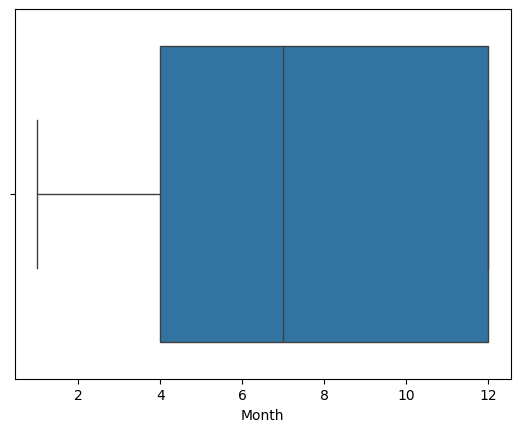

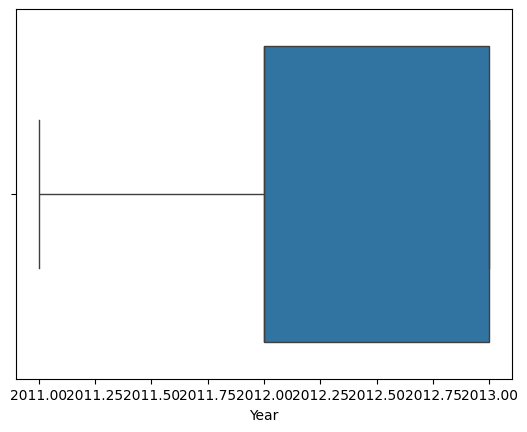

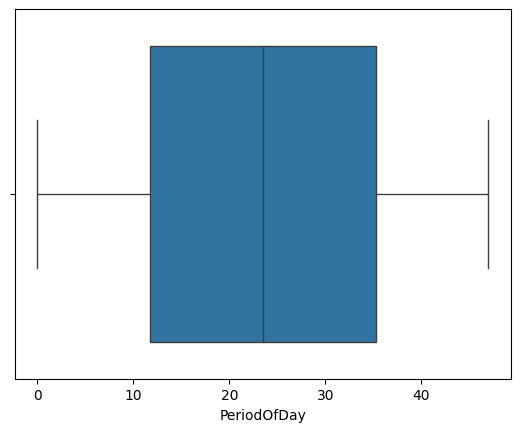

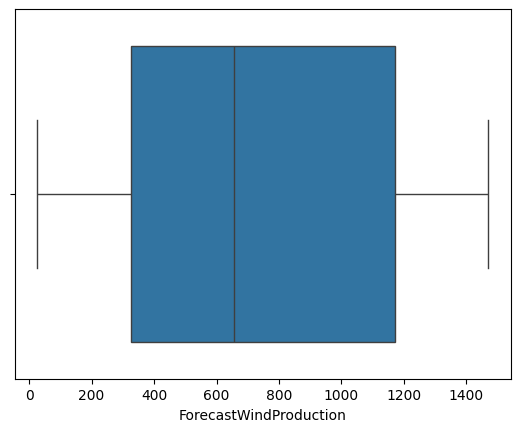

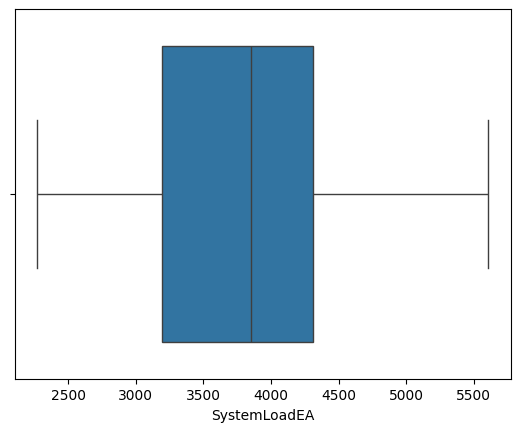

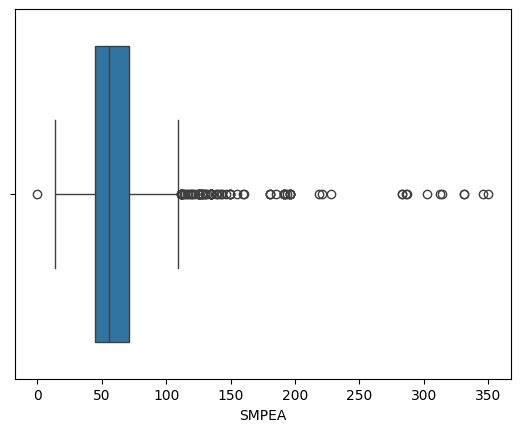

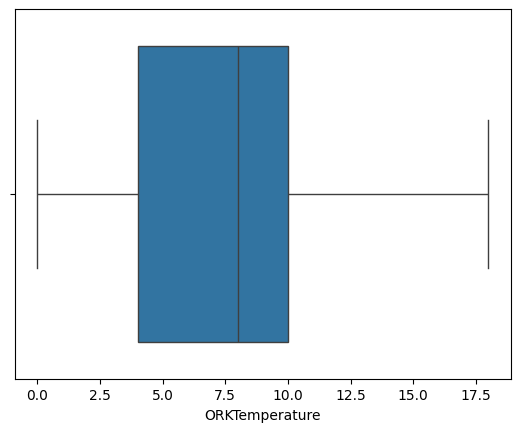

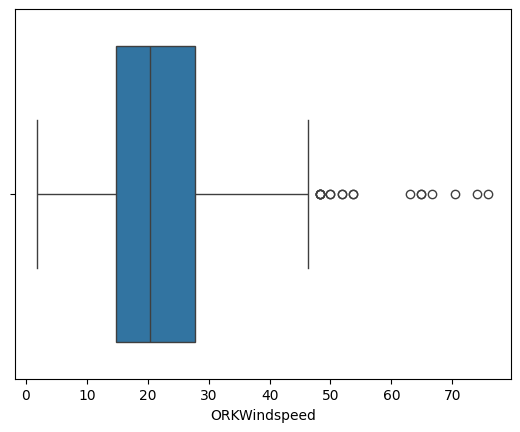

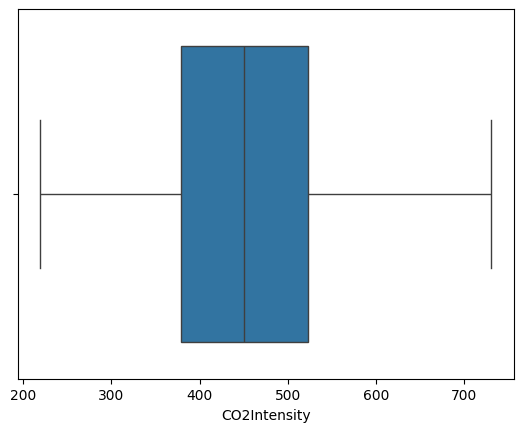

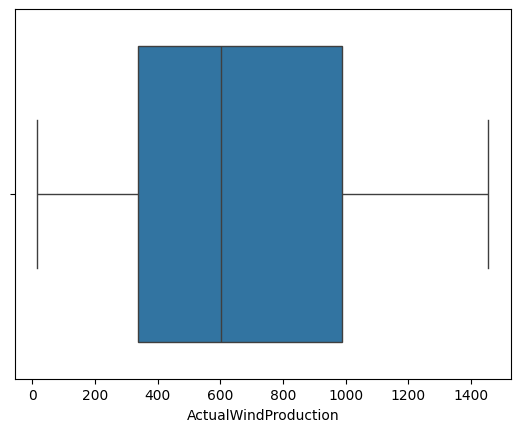

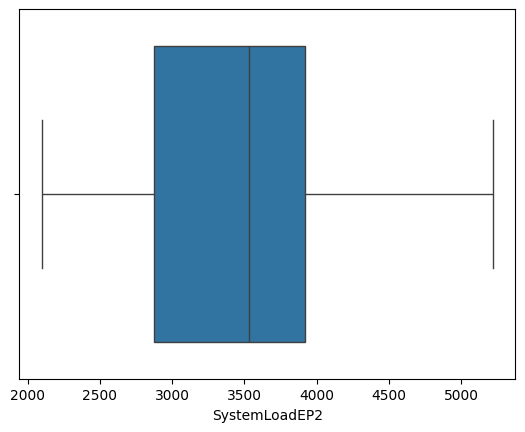

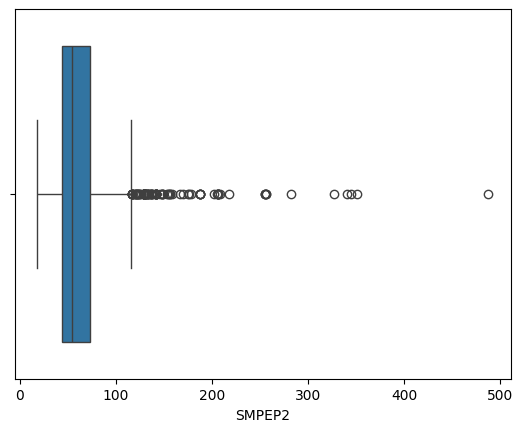

In [ ]:
for i in b.select_dtypes(include="number").columns:
  sns.boxplot(b,x=i)
  plt.show()

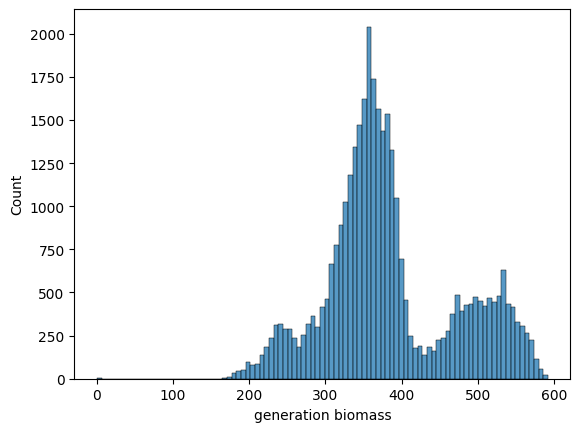

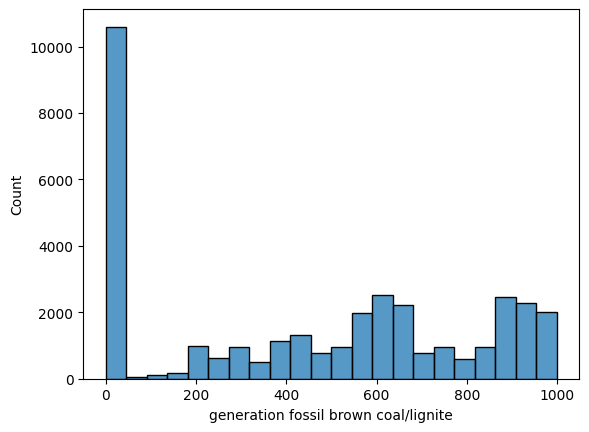

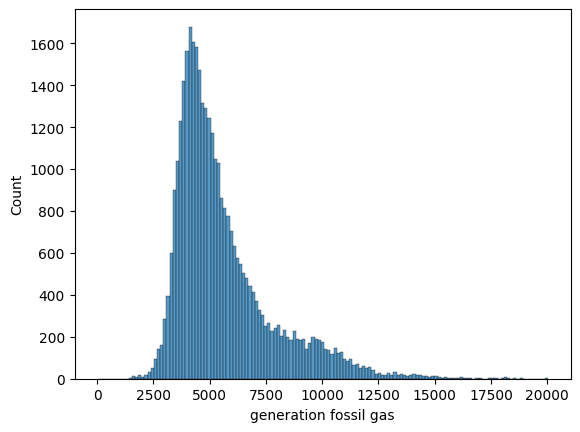

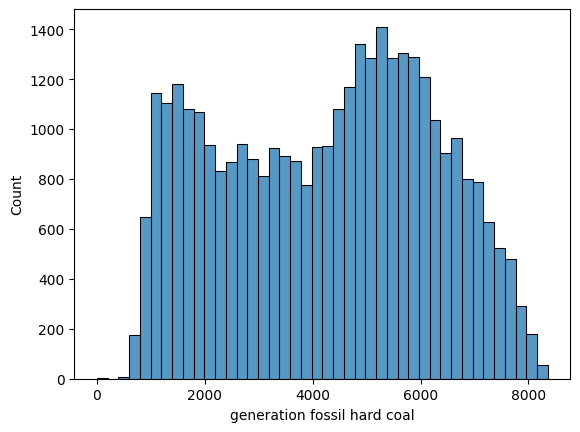

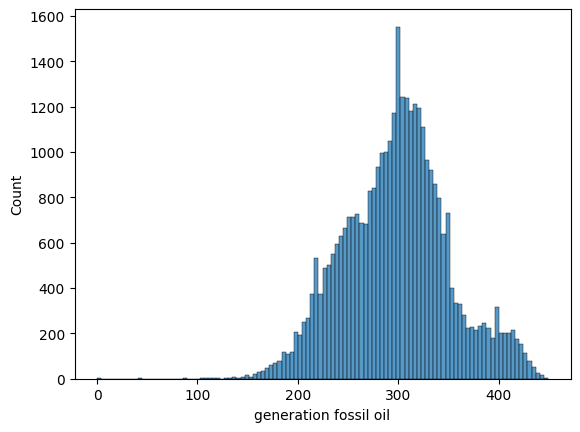

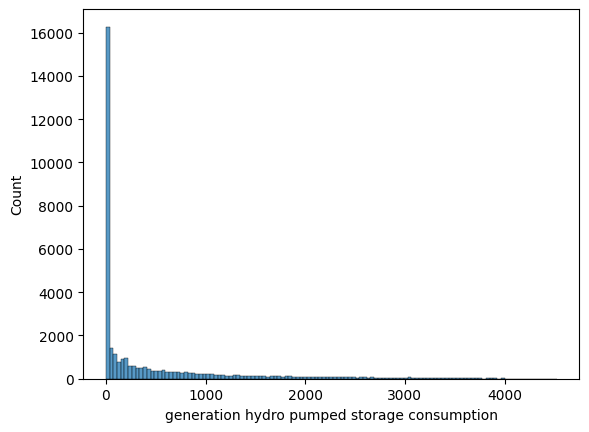

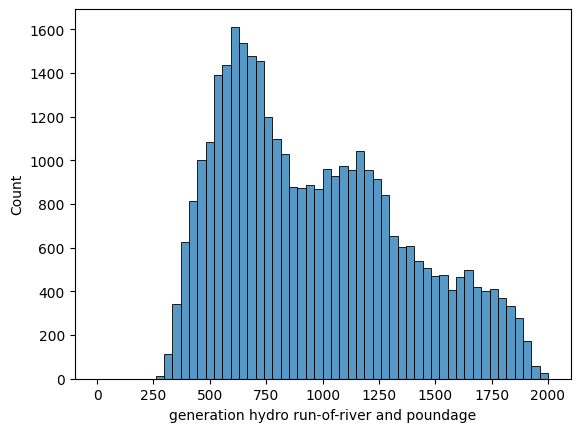

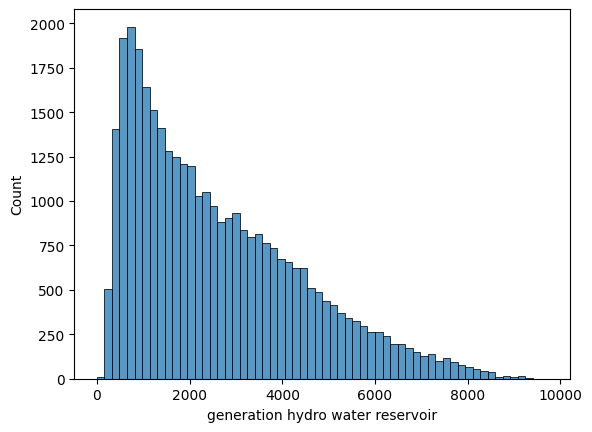

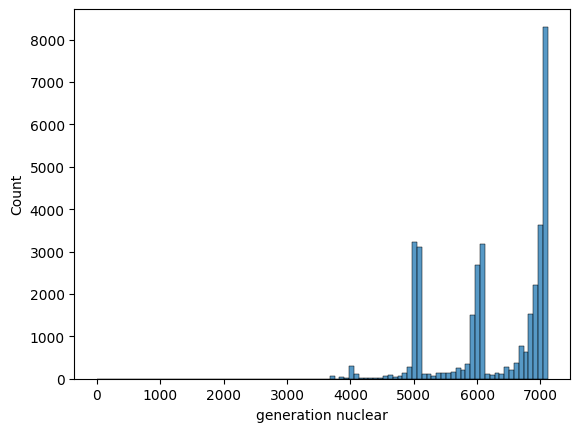

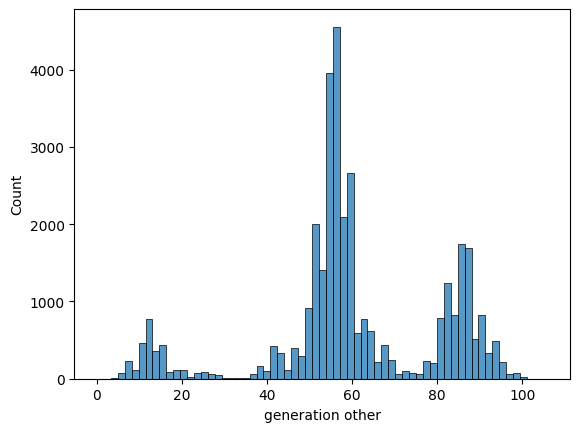

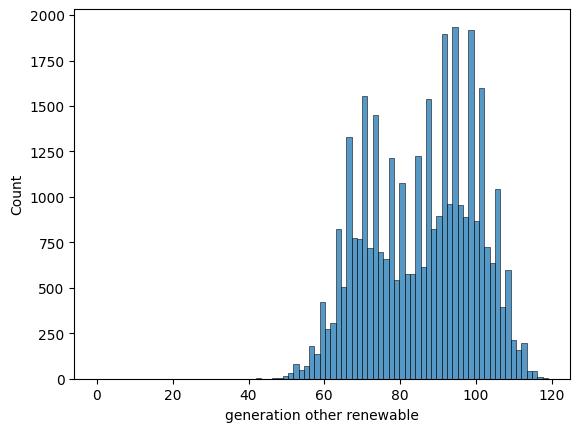

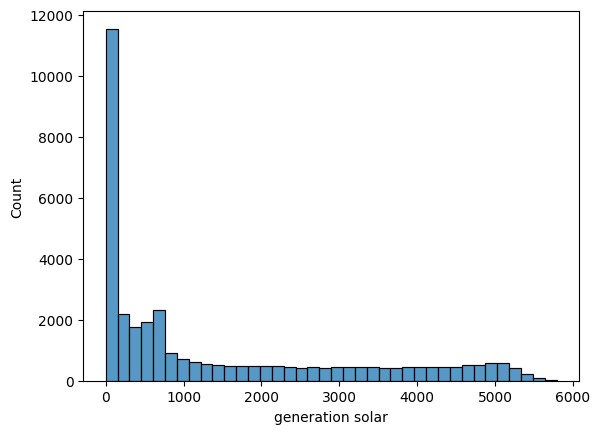

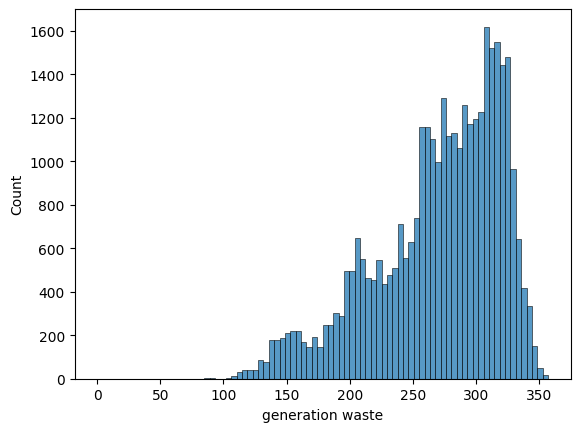

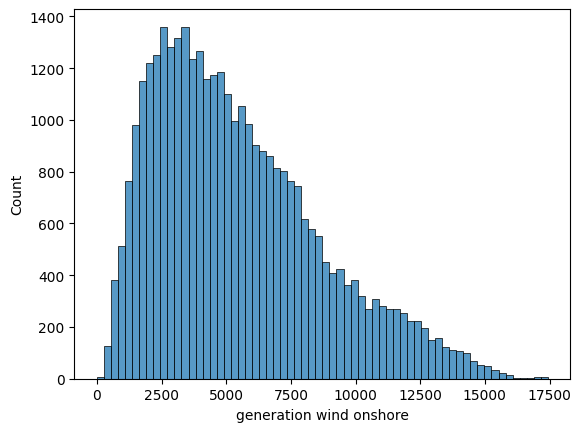

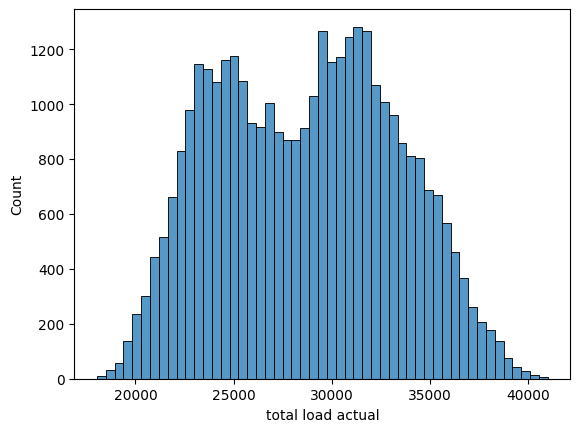

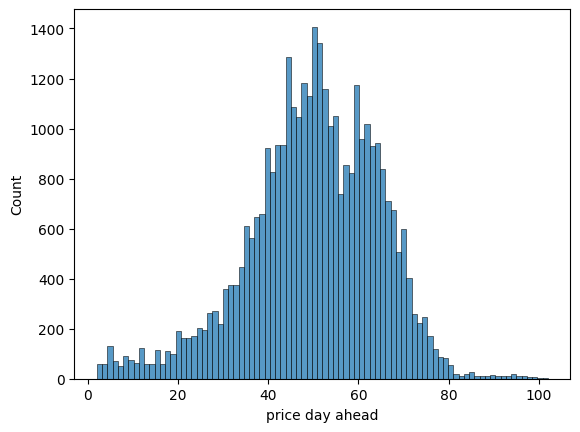

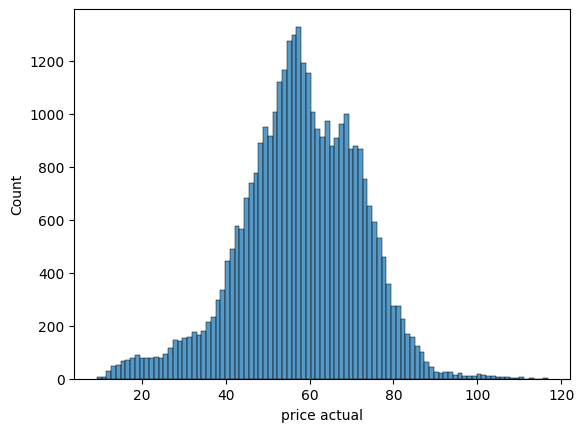

In [ ]:
for i in a.select_dtypes(include="number").columns:
  sns.histplot(a,x=i)
  plt.show()

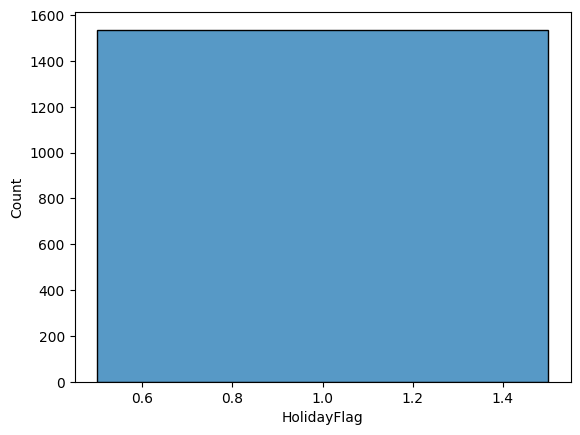

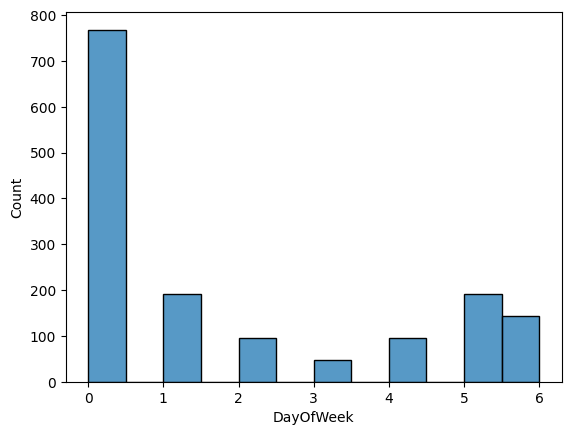

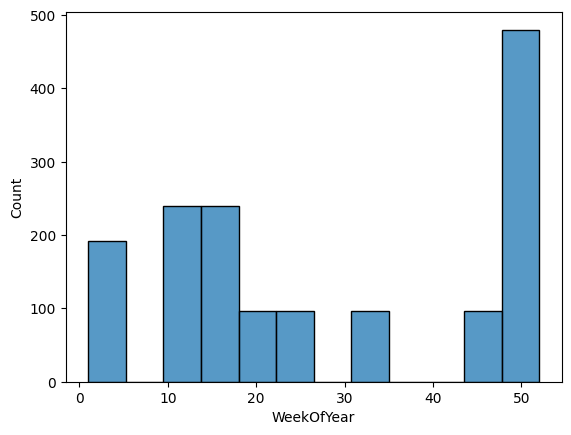

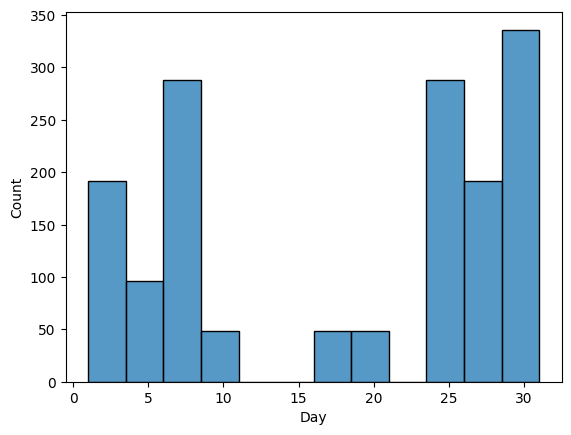

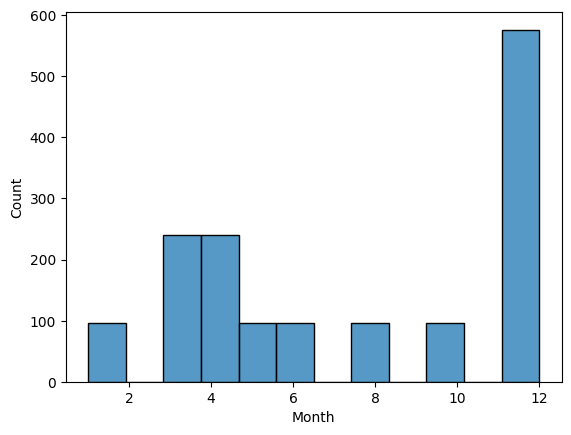

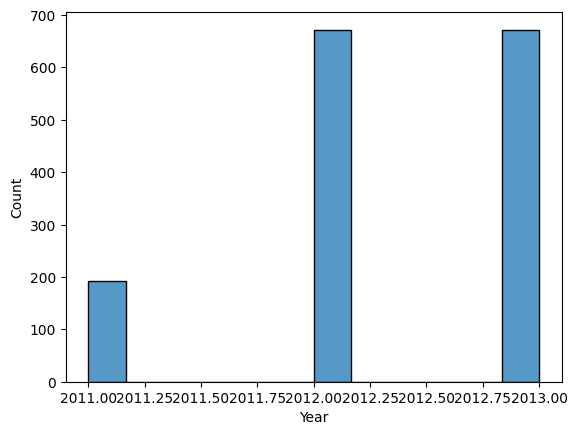

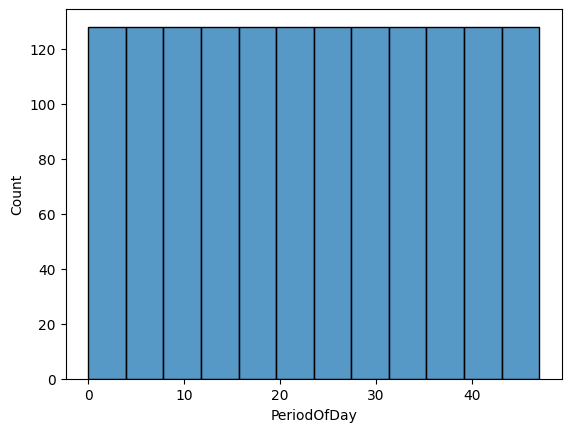

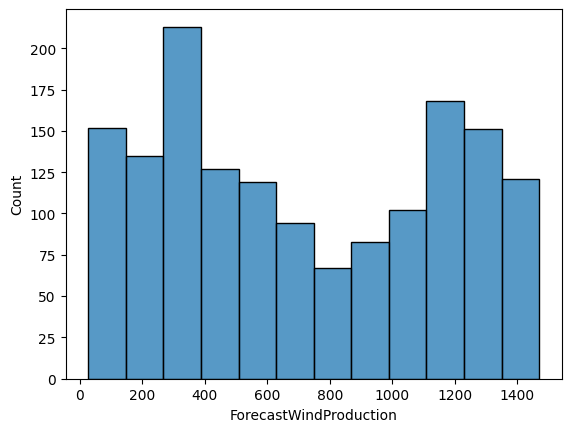

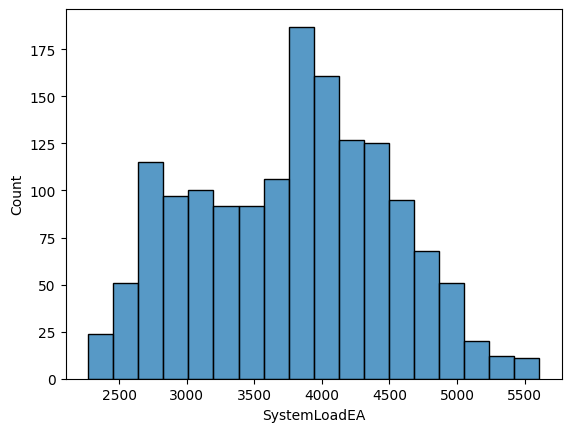

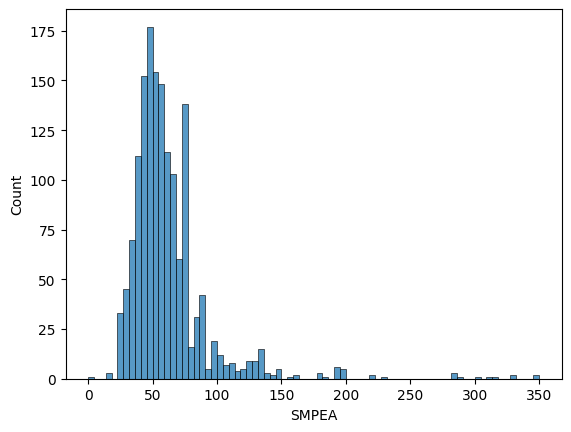

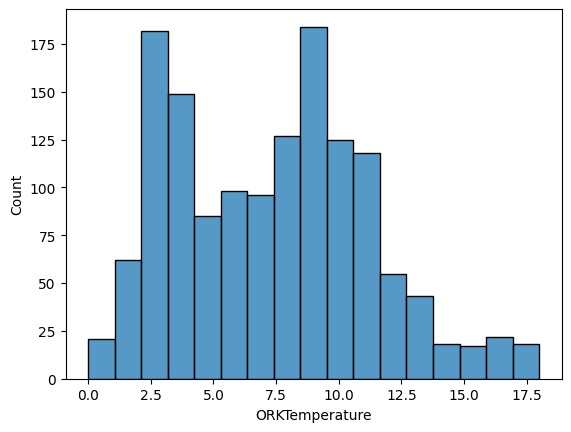

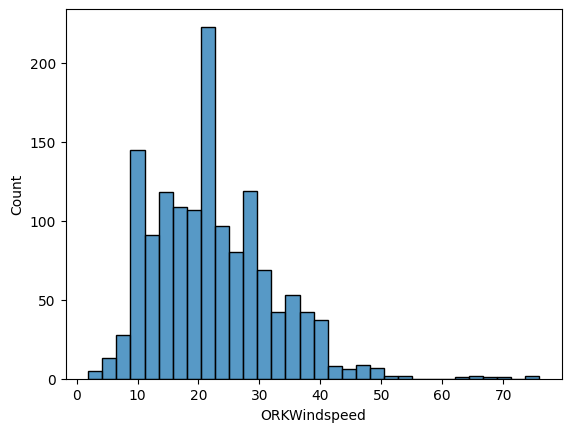

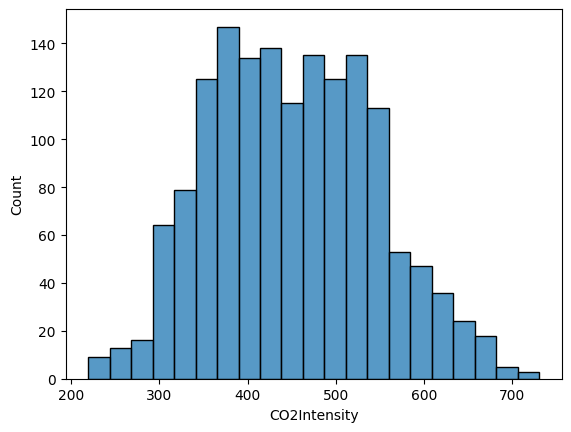

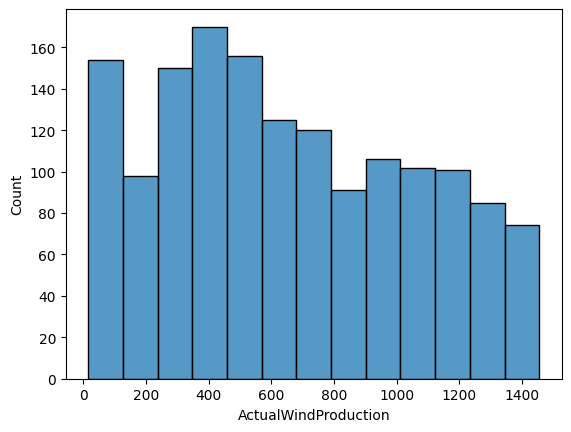

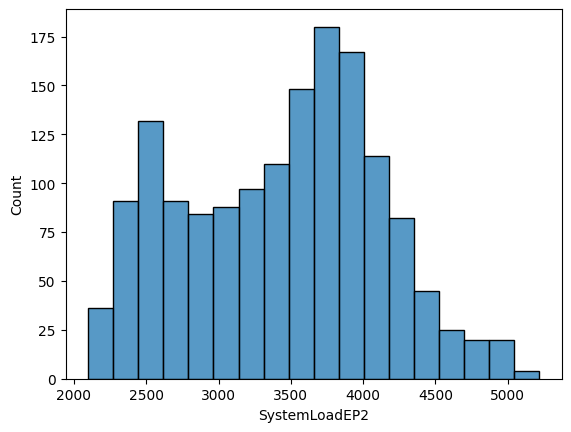

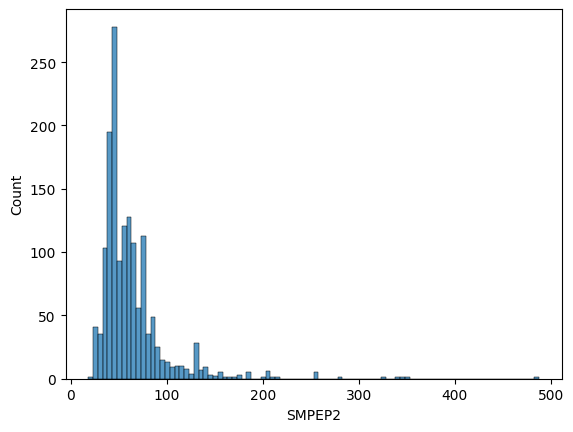

In [ ]:
for i in b.select_dtypes(include="number").columns:
  sns.histplot(b,x=i)
  plt.show()

In [ ]:


from scipy import stats
import numpy as np

# Select only numerical features for z-score calculation
numerical_cols = a.select_dtypes(include=np.number).columns
d_numerical = a[numerical_cols]

# Calculate z-scores for numerical features
z_scores = stats.zscore(d_numerical)

# Filter outliers based on z-scores
d_outliers = d_numerical[(np.abs(z_scores) < 3).all(axis=1)]

In [ ]:
from scipy import stats
# Select only numerical features for z-score calculation
numerical_cols = b.select_dtypes(include=np.number).columns
d_numerical = b[numerical_cols]

# Calculate z-scores for numerical features
z_scores = stats.zscore(d_numerical)

# Filter outliers based on z-scores
d_outliers = d_numerical[(np.abs(z_scores) < 3).all(axis=1)]

<ipython-input-29-c85d5e1ed666>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  b['DateTime'] = pd.to_datetime(b['DateTime'], errors='coerce')


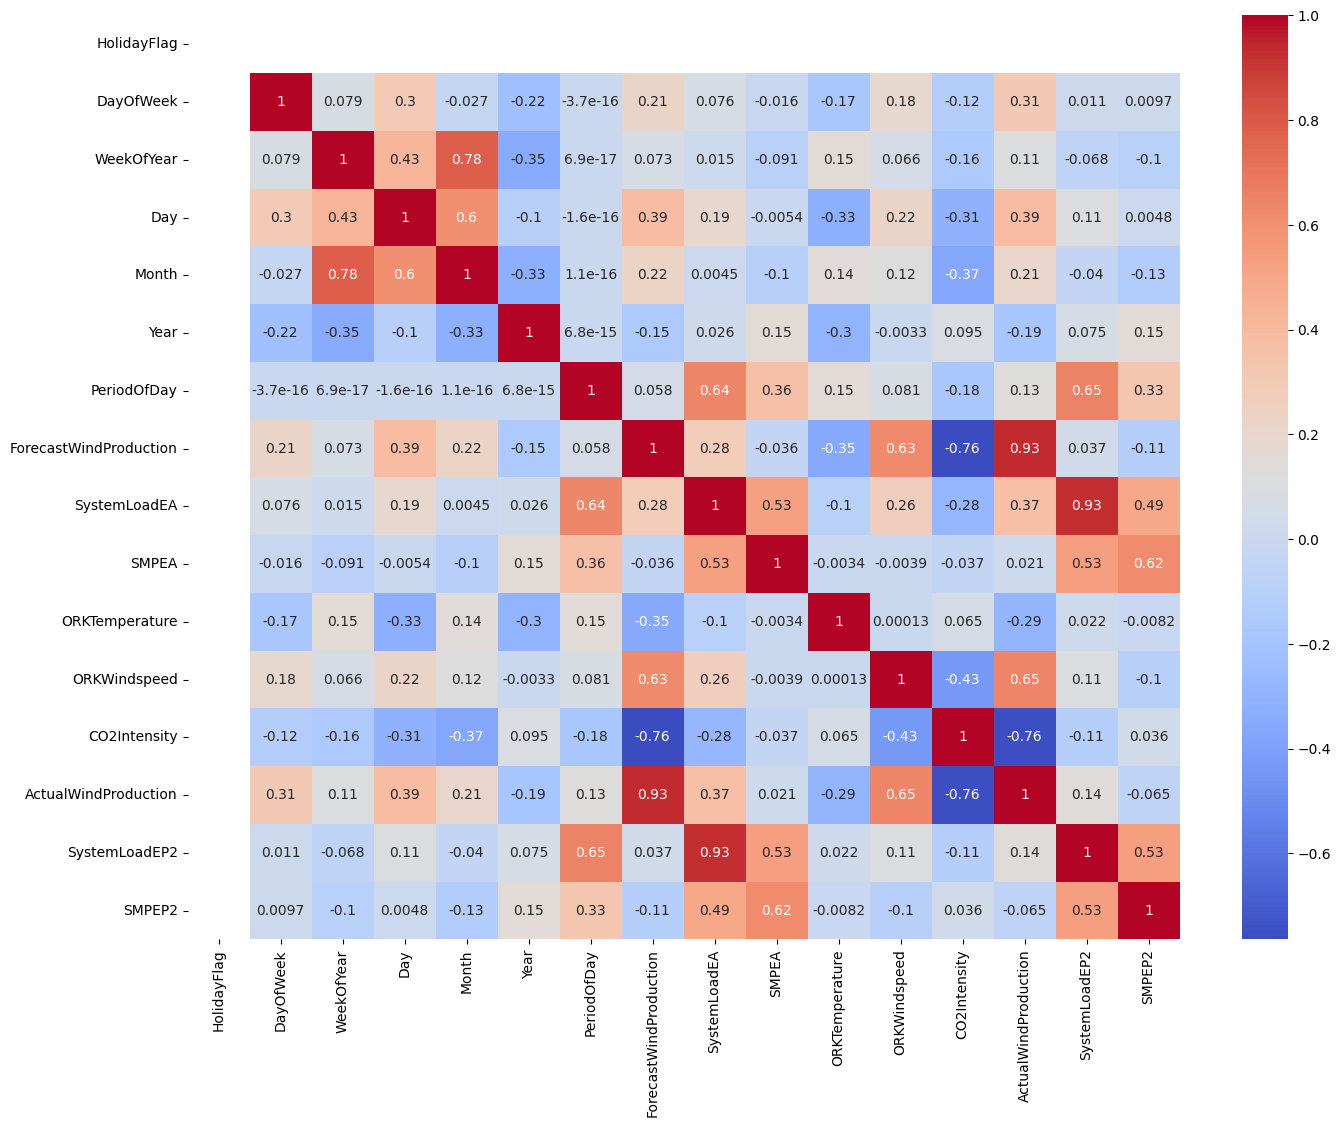

In [ ]:
b['DateTime'] = pd.to_datetime(b['DateTime'], errors='coerce')

# Extract relevant features for correlation
# Excluding the 'DateTime' column
numerical_features = b.select_dtypes(include=np.number).columns
correlations = b[numerical_features].corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()


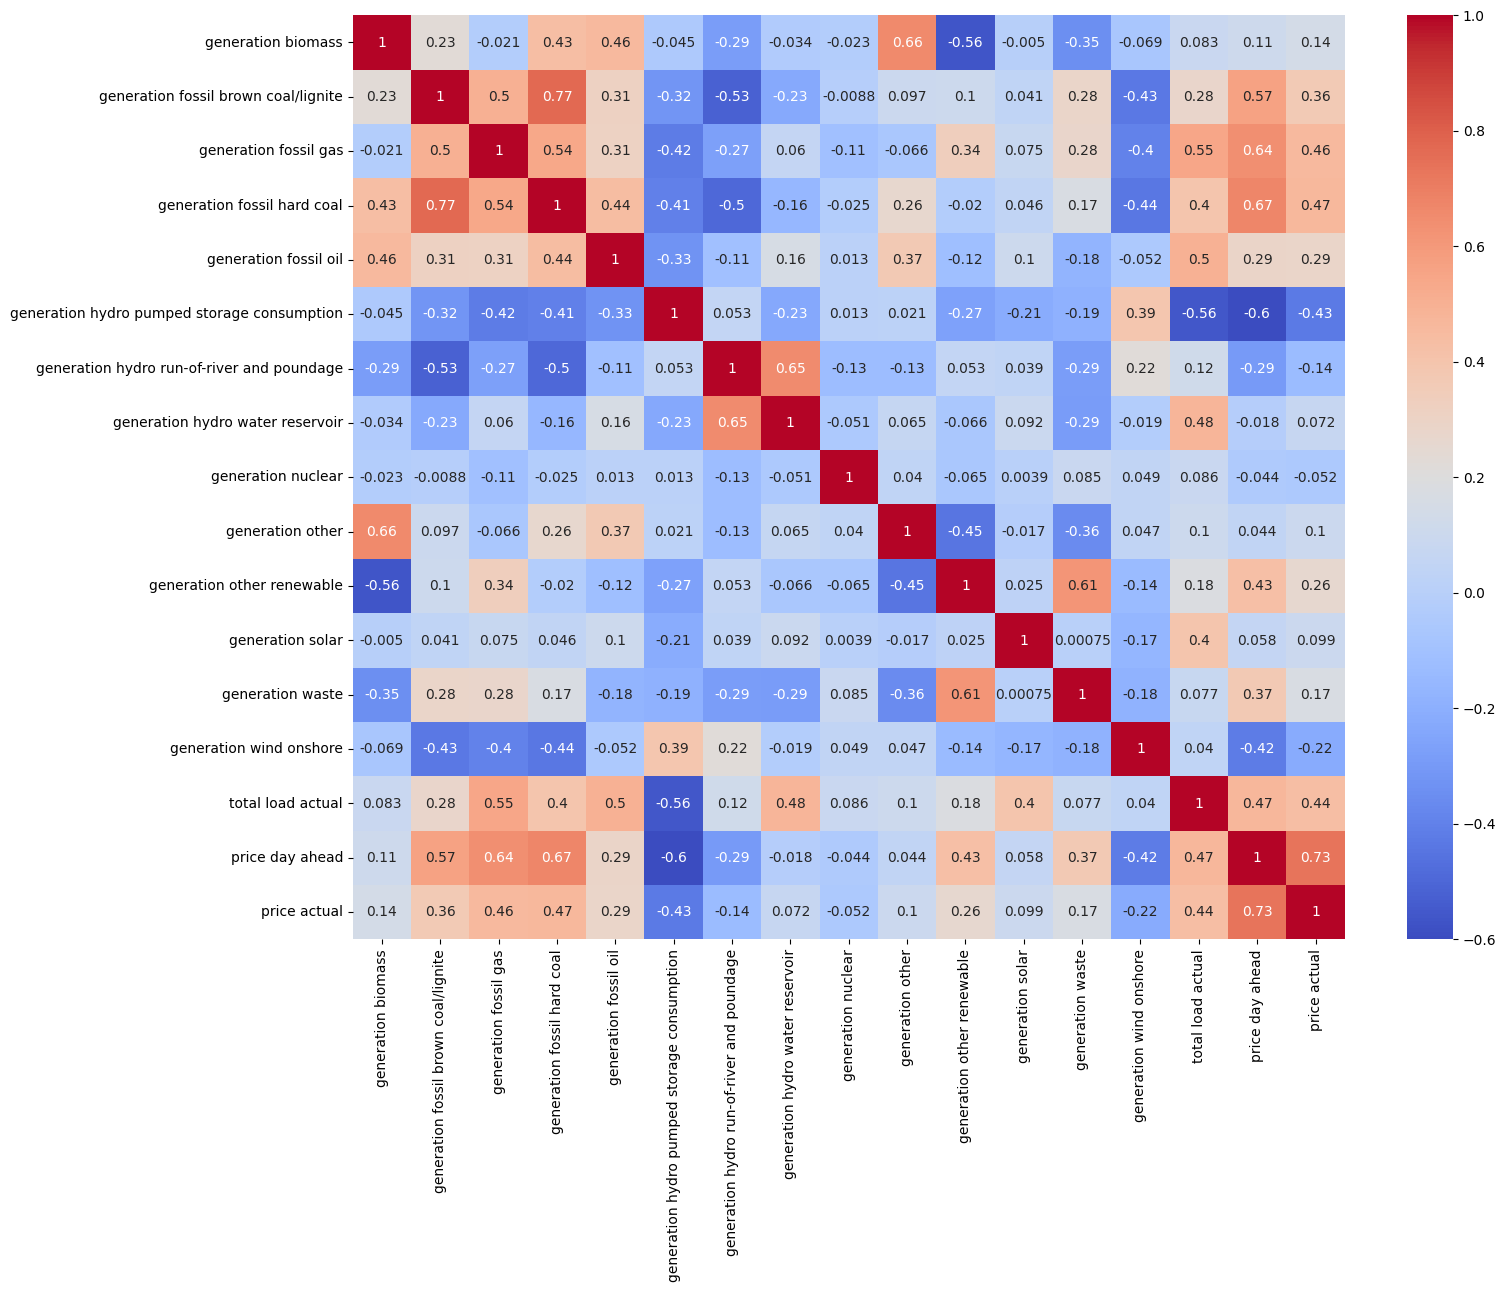

In [ ]:
numerical_features = a.select_dtypes(include=np.number).columns
correlations = a[numerical_features].corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

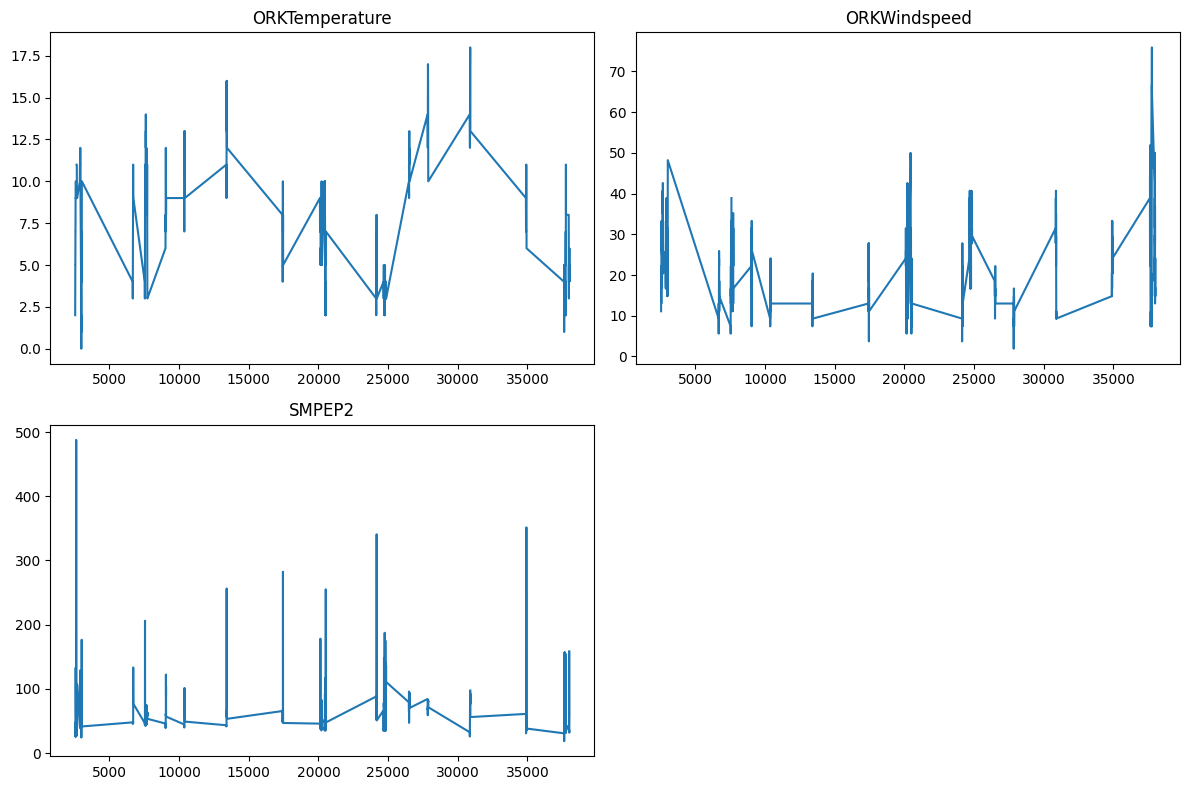

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['ORKTemperature', 'ORKWindspeed', 'SMPEP2']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(b.index, b[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()

Text(0.5, 1.0, 'Daily actual price (0 is Monday)')

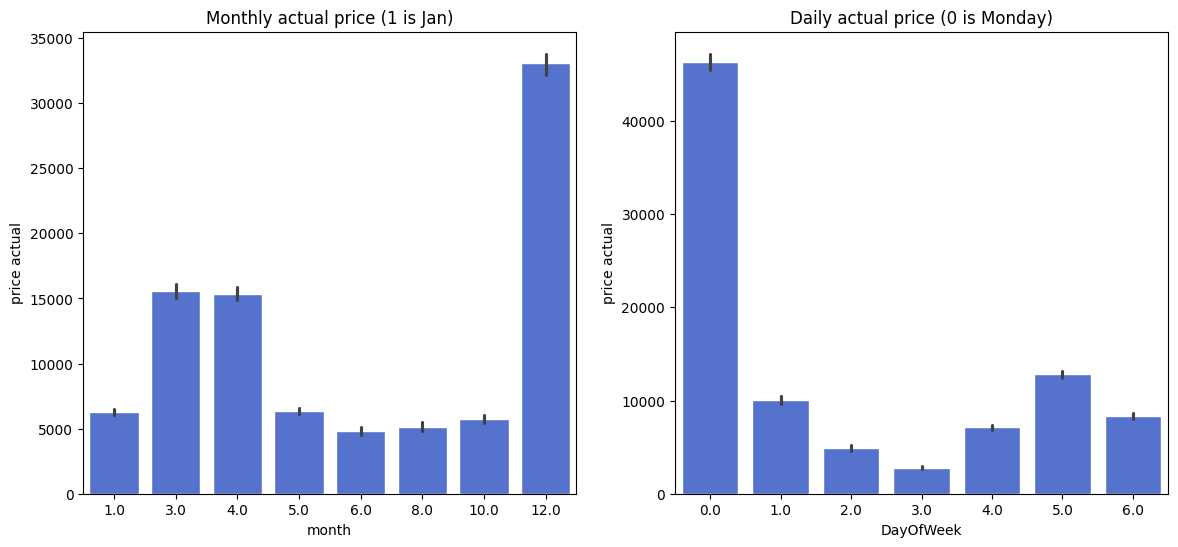

In [ ]:
# Convert 'month' and 'weekday' columns to numeric in DataFrame 'b'
# First check if the 'month' column exists
if 'month' not in b.columns:
    # If not, extract month from the 'DateTime' column
    b['month'] = b['DateTime'].dt.month
else:
    # If it exists, try converting to numeric
    b['month'] = pd.to_numeric(b['month'], errors='coerce')

# Similarly, check for 'DayOfWeek' and extract if needed
if 'DayOfWeek' not in b.columns:
    b['DayOfWeek'] = b['DateTime'].dt.dayofweek
else:
    b['DayOfWeek'] = pd.to_numeric(b['DayOfWeek'], errors='coerce')


# Reset index of DataFrames 'a' and 'b' to ensure numeric index
a = a.reset_index(drop=True)
b = b.reset_index(drop=True)


fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.set(style="darkgrid")

sns.barplot(
    x=b["month"],
    y=a["price actual"],
    estimator=sum,
    color='royalblue',
    ax=axes[0]);
axes[0].set_title('Monthly actual price (1 is Jan)')

sns.barplot(
    x=b["DayOfWeek"],
    y=a["price actual"],
    estimator=sum,
    color='royalblue',
    ax=axes[1]);
axes[1].set_title('Daily actual price (0 is Monday)')

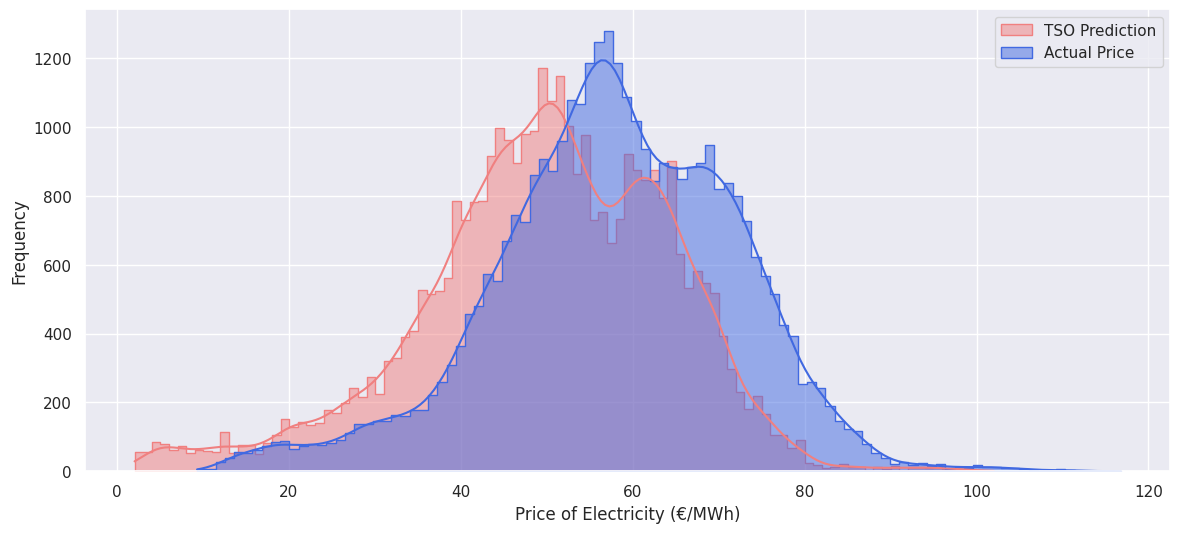

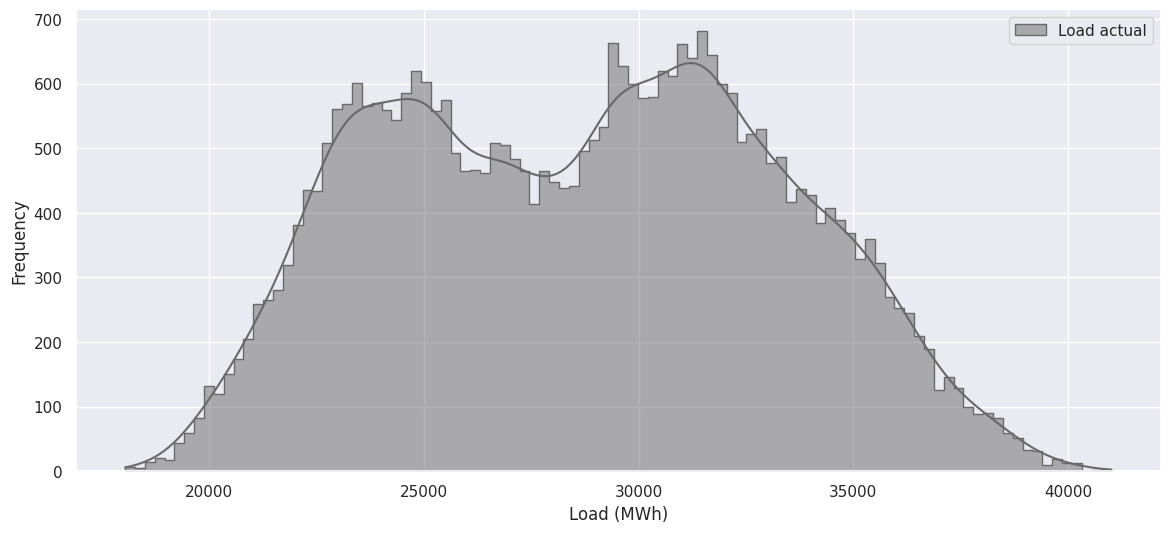

In [ ]:
plt.figure(figsize=(14,6))

gr = sns.histplot(a['price day ahead'], bins=100, label='TSO Prediction', element="step", color='lightcoral', kde = True)
gr = sns.histplot(a['price actual'], bins=100, label='Actual Price', element="step", color='royalblue', kde = True)


gr.set(xlabel="Price of Electricity (€/MWh)", ylabel="Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
gr = sns.histplot(a['total load actual'], bins=100, label='Load actual', element="step", color='dimgrey', kde = True)


gr.set(xlabel="Load (MWh)", ylabel="Frequency")
plt.legend()
plt.show()

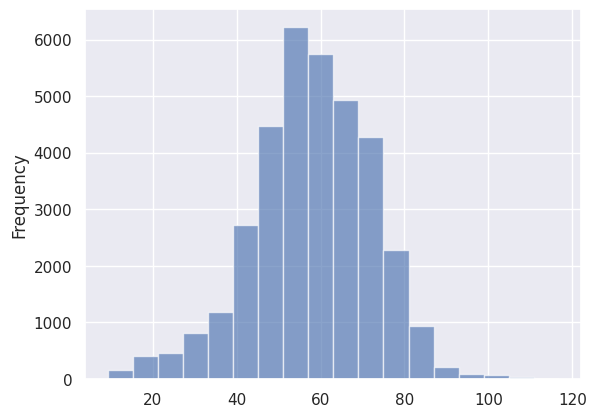

In [ ]:

ax = a['price actual'].plot.hist(bins=18, alpha=0.65)

In [ ]:
x = b[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
          "ActualWindProduction", "SystemLoadEP2"]]
y = b["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x = x[y.notna()]  # Select rows in 'x' where 'y' is not NaN
y = y[y.notna()]  # Select rows in 'y' where 'y' is not NaN

# Now proceed with train-test split and model fitting:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [ ]:
#features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([96.874])

In [ ]:
x = b[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
          "ActualWindProduction", "SystemLoadEP2"]]
# x=data.drop("SMPEP2",axis=1)
y = b["SMPEP2"]
x = x[y.notna()]
y = y[y.notna()]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.3,
                                                random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Randomforest use for complex data and objective data
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred=model.predict(xtest)
print(xtest.shape)
print(ytest.shape)
print(y_pred.shape)

(461, 10)
(461,)
(461,)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mean_y=ytest.mean()
#r2_score based on coefficients detemination
print("R2_Score:",r2_score(ytest,y_pred))
forest_mae=mean_absolute_error(ytest,y_pred)
forest_mse=mean_squared_error(ytest,y_pred)
print("Mean_Absolute_error:",forest_mae)
print("Mean_squared_error:",forest_mse)
print('prediction accuracy: ' +str(1-forest_mae/mean_y))
print("Score:",model.score(xtrain,ytrain))

R2_Score: 0.6508303318614891
Mean_Absolute_error: 9.335721908893717
Mean_squared_error: 440.4399490283731
prediction accuracy: 0.8564028850430396
Score: 0.9402453787052225


In [ ]:
df=pd.DataFrame({"actual":ytest,"predicted":y_pred})
df.tail()

,actual,predicted
296,43.79,43.8099
548,85.53,78.6173
1329,53.70,70.5455
864,47.76,51.7430
986,77.68,80.3780


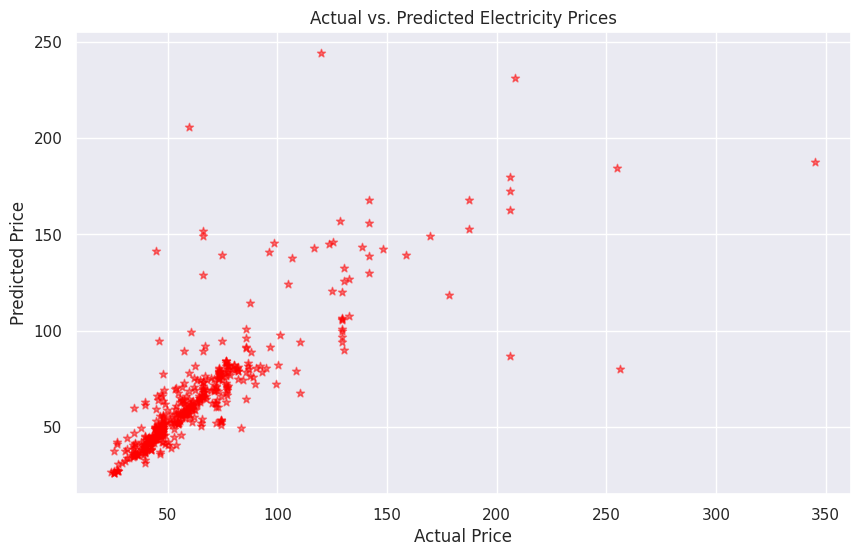

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, alpha=0.5,c="red",marker="*")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Electricity Prices')
plt.show()

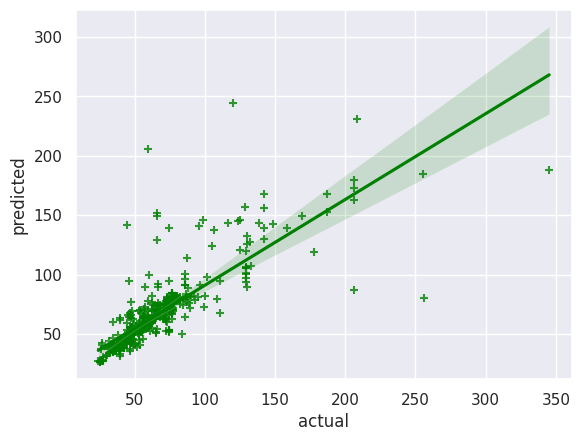

In [ ]:
import seaborn as sns
sns.regplot(x="actual",y="predicted",data=df,color='green',marker="+")
plt.show()

In [ ]:
x1 = a[['generation other', 'generation other renewable', 'generation solar','generation wind onshore','total load actual']]
y1 = a["price actual"]
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x1 = x1[y1.notna()]  # Select rows in 'x' where 'y' is not NaN
y1 = y1[y1.notna()]  # Select rows in 'y' where 'y' is not NaN

# Now proceed with train-test split and model fitting:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1,
                                                test_size=0.2,
                                                random_state=42)

model = RandomForestRegressor()
model.fit(xtrain1, ytrain1)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Randomforest use for complex data and objective data
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(xtrain1, ytrain1)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred1=model.predict(xtest1)
print(xtest1.shape)
print(ytest1.shape)
print(y_pred1.shape)

(7004, 5)
(7004,)
(7004,)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mean_y=ytest1.mean()
#r2_score based on coefficients detemination
print("R2_Score:",r2_score(ytest1,y_pred1))
forest_mae=mean_absolute_error(ytest1,y_pred1)
forest_mse=mean_squared_error(ytest1,y_pred1)
print("Mean_Absolute_error:",forest_mae)
print("Mean_squared_error:",forest_mse)
print('prediction accuracy: ' +str(1-forest_mae/mean_y))
print("Score:",model.score(xtrain1,ytrain1))

R2_Score: 0.5619784818948926
Mean_Absolute_error: 6.912253055396916
Mean_squared_error: 85.33370120319533
prediction accuracy: 0.8804081851343178
Score: 0.9398671857857921


In [ ]:
df=pd.DataFrame({"actual":ytest1,"predicted":y_pred1})
df.tail()

,actual,predicted
14286,50.39,51.7310
15770,72.02,66.4437
18512,49.56,50.6510
31931,66.87,63.8230
33034,82.15,75.6050


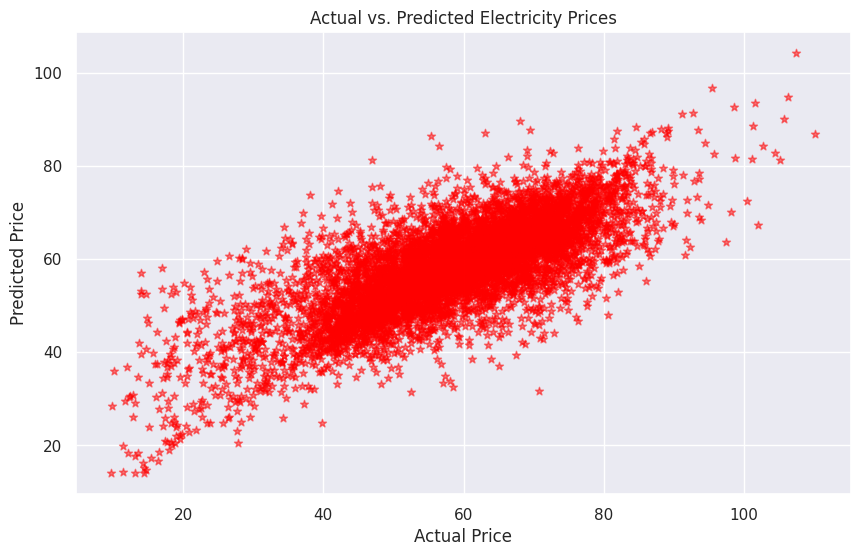

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest1, y_pred1, alpha=0.5,c="red",marker="*")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Electricity Prices')
plt.show()

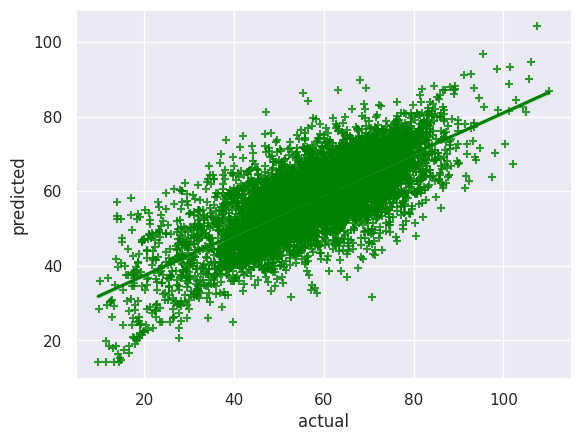

In [ ]:
import seaborn as sns
sns.regplot(x="actual",y="predicted",data=df,color='green',marker="+")
plt.show()

In [ ]:
X_demand = a[['generation solar', 'generation other renewable', 'generation wind onshore', 'total load actual']]
y_demand = a['price actual']

X_price = b[['ORKTemperature', 'ORKWindspeed', 'SystemLoadEP2', 'DayOfWeek']]
y_price = b['SMPEP2']

# Split datasets into training and testing sets
X_demand_train, X_demand_test, y_demand_train, y_demand_test = train_test_split(X_demand, y_demand, test_size=0.2, random_state=42)
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_demand_train = scaler.fit_transform(X_demand_train)
X_demand_test = scaler.transform(X_demand_test)
X_price_train = scaler.fit_transform(X_price_train)
X_price_test = scaler.transform(X_price_test)

In [ ]:
demand_model = RandomForestRegressor(n_estimators=100, random_state=42)
price_model = RandomForestRegressor(n_estimators=100, random_state=42)
demand_model
price_model


RandomForestRegressor(random_state=42)

In [ ]:
y_price_train = y_price_train.fillna(y_price_train.mean())
demand_model.fit(X_demand_train, y_demand_train)
price_model.fit(X_price_train, y_price_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_demand_pred = demand_model.predict(X_demand_test)
y_price_pred = price_model.predict(X_price_test)
y_demand_pred
y_price_pred


array([ 76.8931    ,  53.83420553,  46.6126    ,  67.7888    ,
        30.9693    ,  72.325     ,  50.0044    ,  45.5821    ,
        44.4215    ,  64.3995    , 128.7634    ,  40.832     ,
        57.7946    ,  43.0079    ,  56.0574    ,  50.6928    ,
       177.2786    ,  54.2986    ,  43.3691    ,  51.5463    ,
       130.8587    ,  46.3073    ,  59.7007    ,  56.0754    ,
        53.1855    ,  47.91851011,  52.0967    , 111.5042    ,
        63.0768    ,  71.5591    ,  64.7616    ,  56.6301    ,
        51.9563    ,  41.6201    ,  39.2667    ,  66.3468    ,
        66.9334    ,  51.5545    ,  39.181     ,  49.0381    ,
        61.0205    , 137.8287    ,  62.839     ,  41.4411    ,
        52.3993    ,  58.5041    ,  25.7961    ,  78.7184    ,
       111.5505    ,  67.5582    ,  55.8549    ,  88.6534    ,
        68.1429    , 136.5884    ,  55.849     ,  58.089     ,
        42.3458    ,  40.765     ,  44.1973    ,  46.7587    ,
        61.0623    ,  48.2365    ,  70.3026    ,  59.03

In [ ]:
demand_mse = mean_squared_error(y_demand_test, y_demand_pred)
price_mse = mean_squared_error(y_price_test, y_price_pred)
demand_mse
price_mse

636.8217246720737

In [ ]:
print(f'Demand MSE: {demand_mse:.2f}')
print(f'Price MSE: {price_mse:.2f}')


Demand MSE: 110.36
Price MSE: 636.82


In [ ]:
#features = [['generation other renewable', 'generation solar', 'generation wind onshore', 'total load actual',price day ahead]]
features = np.array([[ 45.0 , 50.0 , 4568.0 ,	35478.0	, 60.10	]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([33.6549])

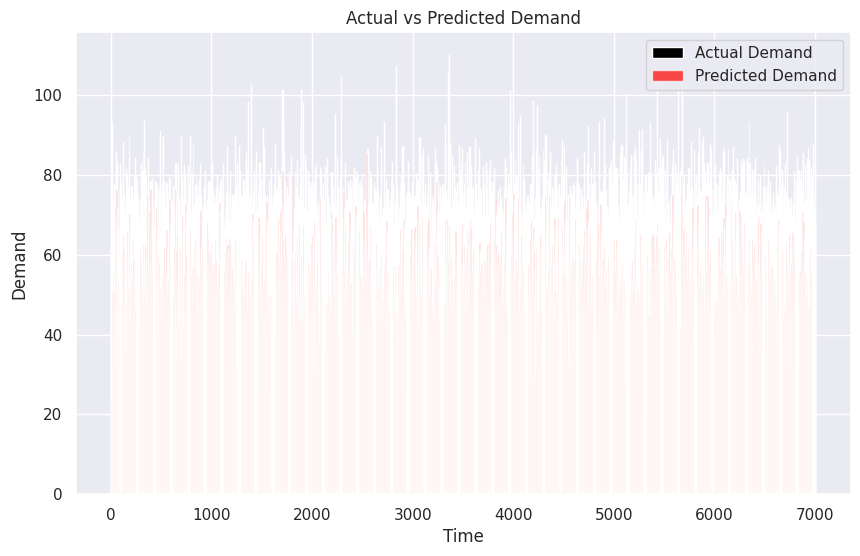

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_demand_test)), y_demand_test, label='Actual Demand', color='black')
plt.bar(range(len(y_demand_pred)), y_demand_pred, label='Predicted Demand', color='red', alpha=0.7)
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


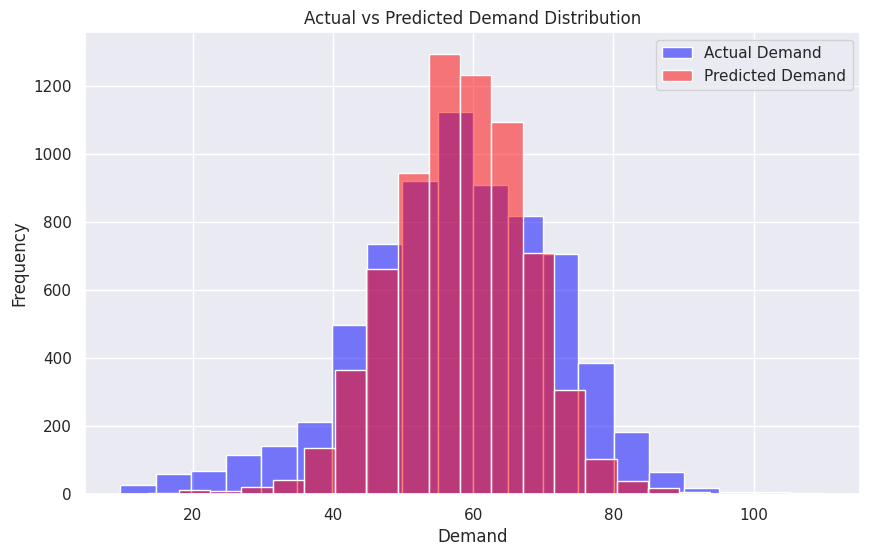

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_demand_test, label='Actual Demand', alpha=0.5, bins=20, color='blue')
sns.histplot(y_demand_pred, label='Predicted Demand', alpha=0.5, bins=20, color='red')
plt.title('Actual vs Predicted Demand Distribution')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


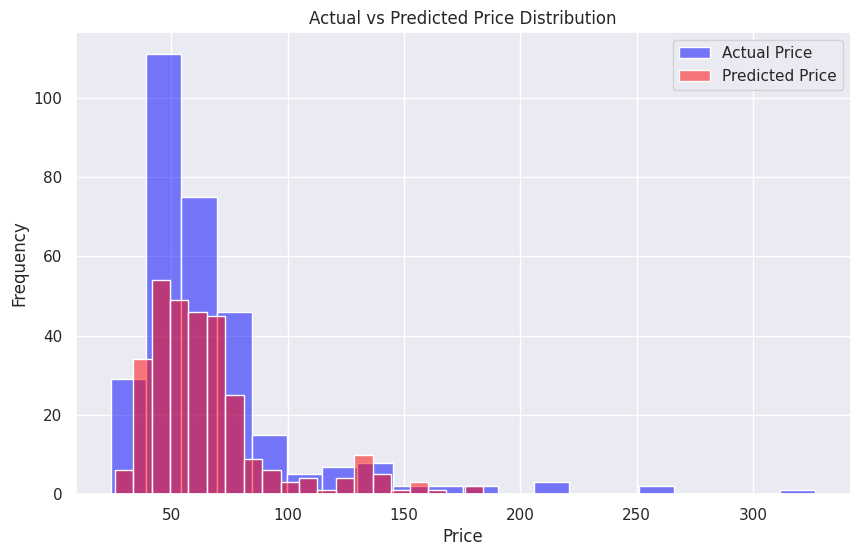

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_price_test, label='Actual Price', alpha=0.5, bins=20, color='blue')
sns.histplot(y_price_pred, label='Predicted Price', alpha=0.5, bins=20, color='red')
plt.title('Actual vs Predicted Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


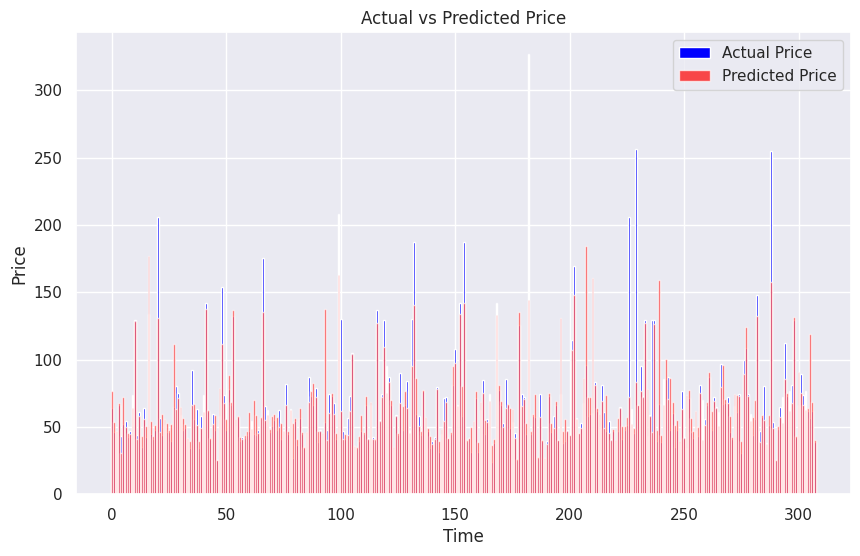

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_price_test)), y_price_test, label='Actual Price', color='blue')
plt.bar(range(len(y_price_pred)), y_price_pred, label='Predicted Price', color='red', alpha=0.7)
plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_demand = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

param_grid_price = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
grid_search_demand = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_demand, cv=5)
grid_search_demand.fit(X_demand_train, y_demand_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [ ]:
grid_search_price = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_price, cv=5)
grid_search_price.fit(X_price_train, y_price_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [ ]:
print(f"Best parameters demand: {grid_search_demand.best_params_}")
print(f"Best score demand: {grid_search_demand.best_score_}")


Best parameters demand: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best score demand: 0.4389011614617485


In [ ]:

print(f"Best parameters price: {grid_search_price.best_params_}")
print(f"Best score price: {grid_search_price.best_score_}")


Best parameters price: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}
Best score price: 0.48257326033087045


In [ ]:
demand_model = grid_search_demand.best_estimator_
price_model = grid_search_price.best_estimator_
demand_model
price_model

RandomForestRegressor(max_depth=15, min_samples_split=10, random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_demand_binary = (y_demand_pred > 100).astype(int)  # Example threshold
fpr, tpr, thresholds = roc_curve(y_demand_test > 100, y_pred_demand_binary)
roc_auc = auc(fpr, tpr)
print(f'Demand Forecasting ROC-AUC: {roc_auc}')




Demand Forecasting ROC-AUC: 0.5833333333333334


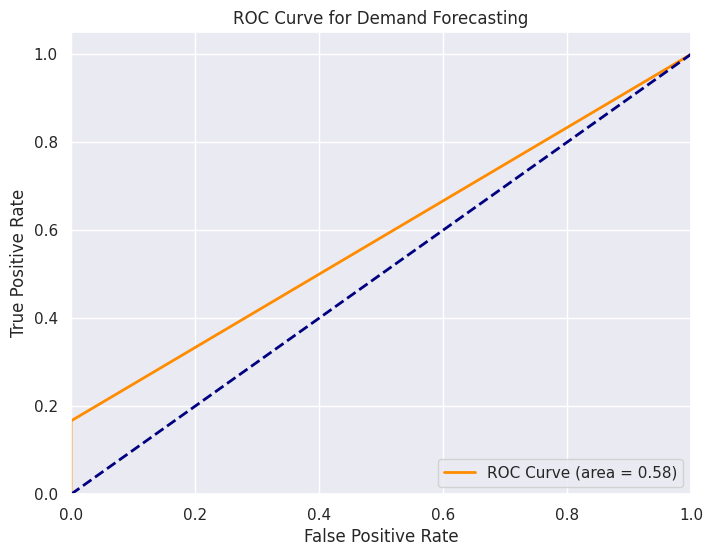

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Demand Forecasting')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
y_pred_demand_binary = (y_demand_pred > 100).astype(int)
accuracy = accuracy_score(y_demand_test > 100, y_pred_demand_binary)
precision = precision_score(y_demand_test > 100, y_pred_demand_binary)
recall = recall_score(y_demand_test > 100, y_pred_demand_binary)
print(f'Demand Forecasting Accuracy: {accuracy}')
print(f'Demand Forecasting Precision: {precision}')
print(f'Demand Forecasting Recall: {recall}')


Demand Forecasting Accuracy: 0.9985722444317533
Demand Forecasting Precision: 1.0
Demand Forecasting Recall: 0.16666666666666666


In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_price_binary = (y_price_pred > 100).astype(int)  # Example threshold
fpr, tpr, thresholds = roc_curve(y_price_test > 100, y_pred_price_binary)
roc_auc = auc(fpr, tpr)
print(f'Price Forecasting ROC-AUC: {roc_auc}')



Price Forecasting ROC-AUC: 0.8761322463768116


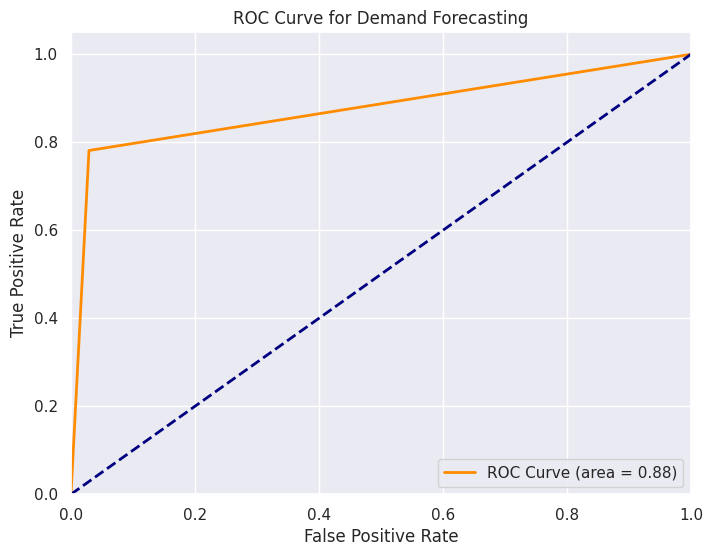

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Demand Forecasting')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
y_pred_price_binary = (y_price_pred > 100).astype(int)
accuracy = accuracy_score(y_price_test > 100, y_pred_price_binary)
precision = precision_score(y_price_test > 100, y_pred_price_binary)
recall = recall_score(y_price_test > 100, y_pred_price_binary)
print(f'Price Forecasting Accuracy: {accuracy}')
print(f'Price Forecasting Precision: {precision}')
print(f'Price Forecasting Recall: {recall}')

Price Forecasting Accuracy: 0.9512987012987013
Price Forecasting Precision: 0.7575757575757576
Price Forecasting Recall: 0.78125


In [ ]:
future_dates = pd.date_range(start='2024-12-01', end='2025-01-01', freq='D')

# Create input features
future_X_demand = pd.DataFrame({
    'generation solar': np.repeat(500, 31),  # assumed solar generation
    'generation other renewable': np.repeat(200, 31),  # assumed other renewable generation
    'generation wind onshore': np.repeat(300, 31),  # assumed wind onshore generation
    'total load actual': np.repeat(10000, 31)  # assumed total load
})

# Predict future demand
future_demand_pred = demand_model.predict(future_X_demand)

# Print predictions
print("Next Month Demand Prediction:")
print(future_demand_pred)


Next Month Demand Prediction:
[88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899
 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899
 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899 88.0899
 88.0899 88.0899 88.0899 88.0899]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
future_dates = pd.date_range(start='2024-12-01', end='2025-01-01', freq='D')

# Create input features
future_X_price = pd.DataFrame({
    'ORKTemperature': np.repeat(10, 31),  # assumed temperature
    'ORKWindspeed': np.repeat(5, 31),  # assumed wind speed
    'SystemLoadEP2': np.repeat(5000, 31),  # assumed system load
    'DayOfWeek': np.repeat(1, 31)  # assumed day of week
})

# Predict future prices
future_price_pred = price_model.predict(future_X_price)

# Print predictions
print("Next Month Price Prediction:")
print(future_price_pred)


Next Month Price Prediction:
[152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536
 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536
 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536
 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536 152.4536]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
month_d=future_demand_pred.mean()
print("Next Month Demand Prediction:",month_d)
month_p=future_price_pred.mean()
print("Next Month Price Prediction:",month_p)

Next Month Demand Prediction: 88.0899
Next Month Price Prediction: 152.45359999999997
